Kappa 1 Ceti is on the list and is a good proxy for on of the mMEATS stars. Lots of archival data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
star = 'HIP-15457'

In [3]:
#tom ayres stis uv

In [4]:
uvpath ='/media/david/2tb_ext_hd/hddata/hwo/data/hst/HIP-15457/tayres/'
tspec = fits.getdata('{}h_hd20630_uvsum_1x_51806_spc.fits'.format(uvpath), 1)[0]

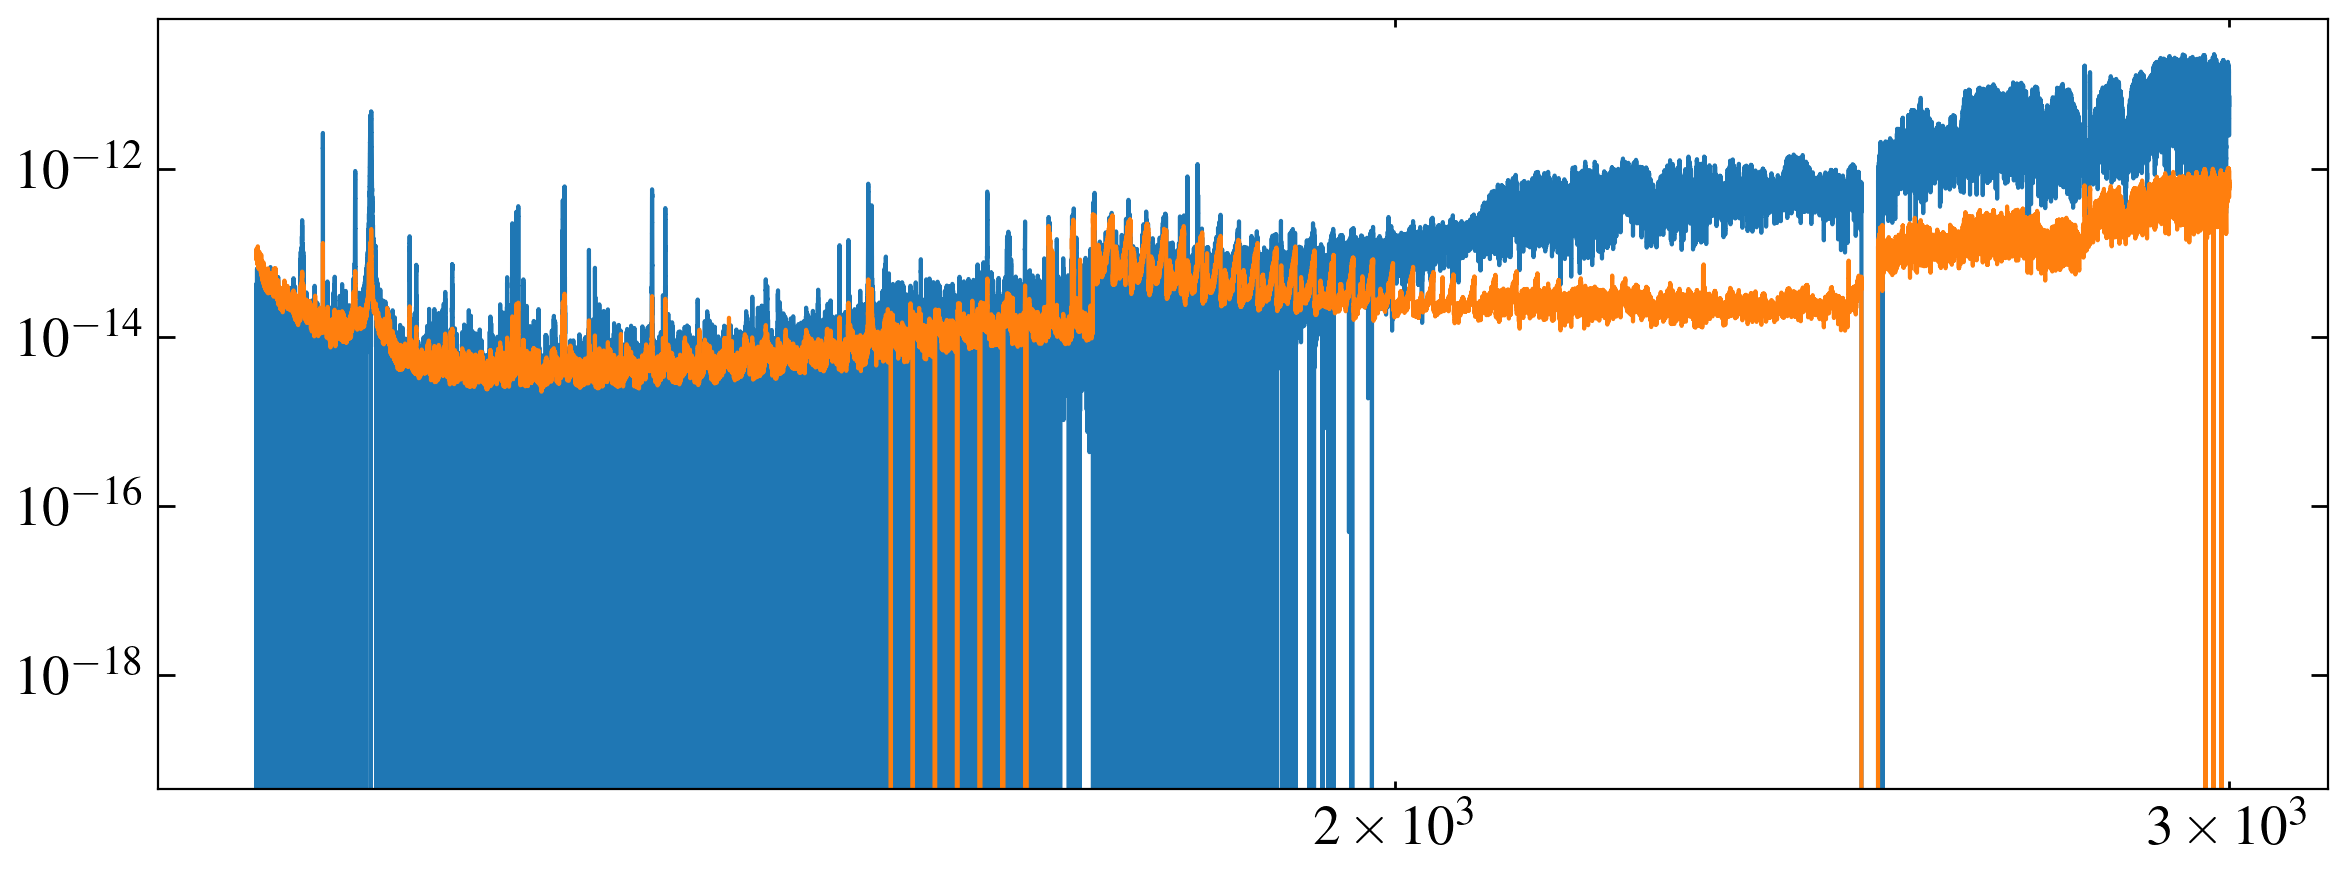

In [5]:
w_uv, f_uv, e_uv = tspec['WAVE'], tspec['FLUX'], tspec['ERROR']
plt.step(w_uv, f_uv, where='mid')
plt.step(w_uv, e_uv, where='mid')

plt.yscale('log')
plt.xscale('log')

Some CCD data I need to re-extract 

In [6]:
path = '/media/david/2tb_ext_hd/hddata/hwo/data/hst/HIP-15457/stis/'

In [7]:
import stistools

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.10/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


In [8]:
os.environ['oref'] = path

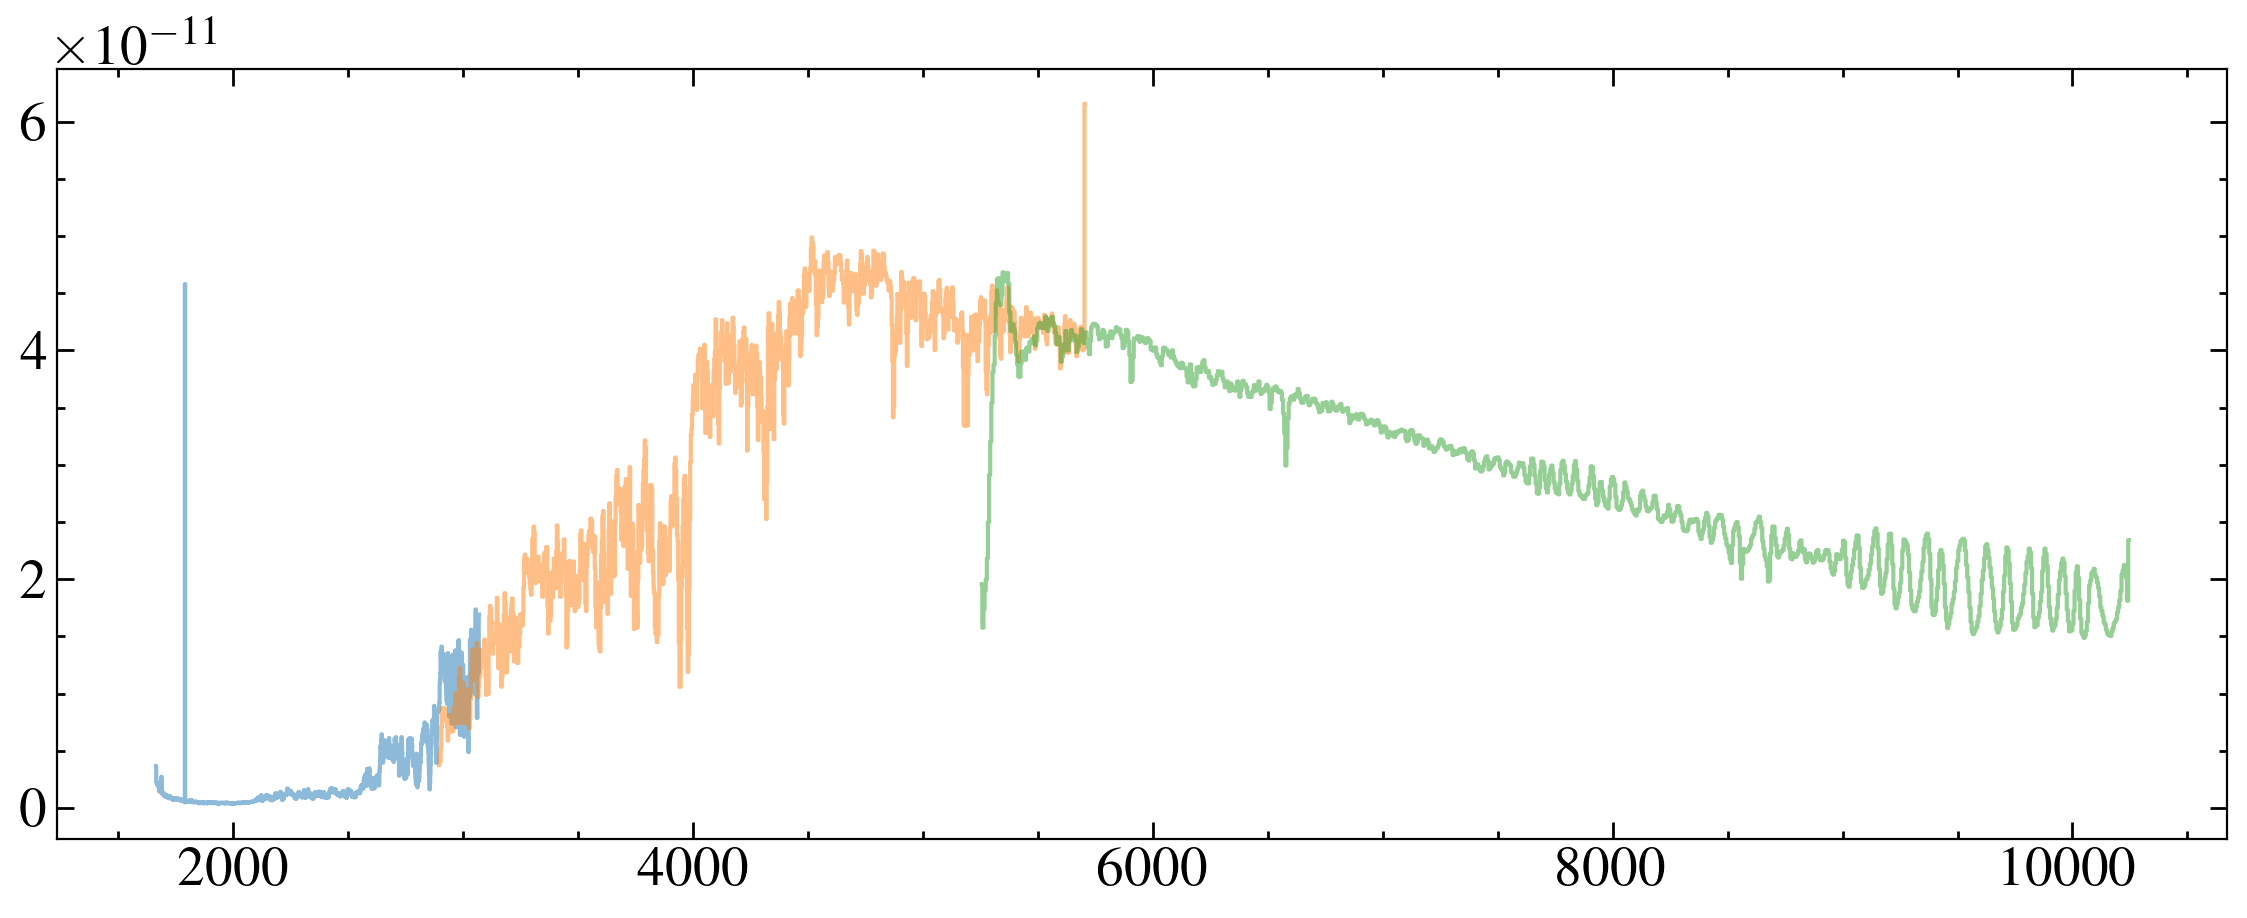

In [35]:
roots = ['O8RU3X010', 'O8RU3XHCQ', 'O8RU3XHDQ']

for i, root in  enumerate(roots):
    root = root.lower()
    flt = '{}/{}_flt.fits'.format(path, root)
    SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    grating = fits.getheader(flt,0)['OPT_ELEM']
    cenwave = fits.getheader(flt,0)['CENWAVE']
#     tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/kap1cet/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
#     a2center = get_a2center(xs[i],ys[i], tracegrid)
#     print(root)
#     print(a2center)
    # a2center = 375
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/kap1cet/{}_new.trl'.format(rootname), bksmode='off')
    
    data = fits.getdata(outname, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1150 
    w, f, e = w[mask], f[mask], e[mask]
    
    plt.step(w, f, where='mid', alpha=0.5)
    
# plt.xlim(1150, 1250)
# plt.ylim(-0.1e-15, 0.5e-15)
# plt.axhline(0, ls='--', c='0.5')
       

    
# # data = Table(fits.getdata('draft_hlsp/kap1cet/hlsp_muscles_hst_stis_wasp-121_g140l_v1_component-spec.fits', 1))



# w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']

# plt.step(w[w > 1150], f[w > 1150], where='mid')

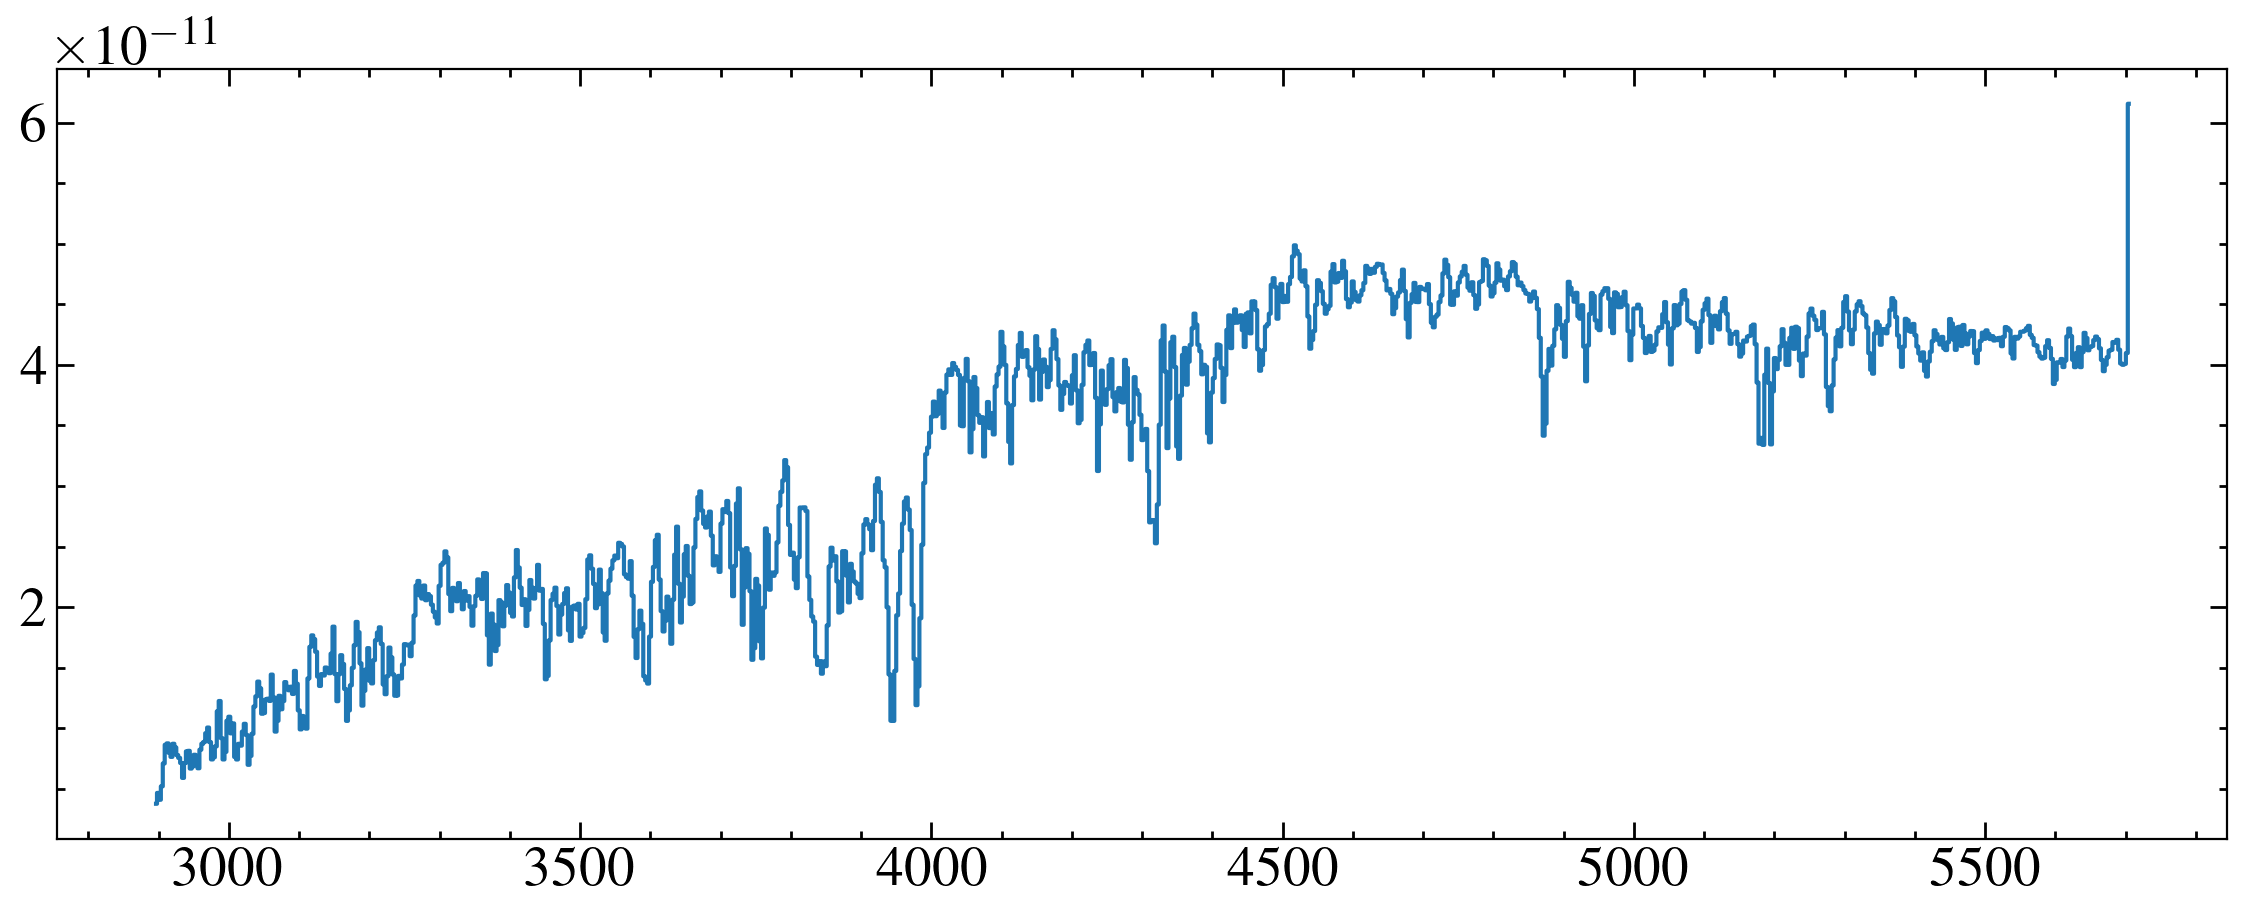

In [36]:
odata = fits.getdata('reextractions/kap1cet/o8ru3xhcq_new_x1d.fits',1)[0]
ow, of, oe= odata['WAVELENGTH'], odata['FLUX'], odata['ERROR']
plt.step(ow, of, where='mid')

Need to defringe as well. Script it up?

In [11]:
# # for i, x in enumerate(g750ls):

# x = '{}o8ru3xhdq_raw_2_x1d.fits'.format(path)

# hdr = fits.getheader(x, 0)
# root = hdr['ROOTNAME']
# flat = hdr['FRNGFLAT']
# print(hdr['ROOTNAME'], hdr['FRNGFLAT'])
# flatpath = '{}{}'.format(path, flat.lower())
# scipath = '{}{}'.format(path, root)
# stistools.defringe.normspflat('{}_raw.fits'.format(flatpath),
#                           '{}_nsp.fits'.format(flatpath), do_cal=True,
#                           wavecal='{}_wav.fits'.format(scipath))
# with fits.open('{}_nsp.fits'.format(flatpath), mode='update') as hdulist:
#     hdulist[1].data[:,:250] = 1
    
    
# stistools.defringe.prepspec('{}{}_raw.fits'.format(path, root))
    
# mode = fits.getheader('{}_raw.fits'.format(scipath),0)['OPT_ELEM']
# if mode == "G750L":
#     prod_type = "crj"
# elif mode == "G750M":
#     prod_type = "sx2"
# # prod_type='raw_2_x2d'


# if os.path.exists('{}_frr.fits'.format(flatpath)):
#     os.remove('{}_frr.fits'.format(flatpath))

# stistools.defringe.mkfringeflat('{}_{}.fits'.format(scipath, prod_type), '{}_nsp.fits'.format(flatpath),
#                                 '{}_frr.fits'.format(flatpath), beg_shift=-0.5, end_shift=2, shift_step=0.1,
#                                 beg_scale=0.8, end_scale=1.7, scale_step=0.04)

# stistools.defringe.defringe('{}_{}.fits'.format(scipath, prod_type), '{}_frr.fits'.format(flatpath), overwrite=True)

# outpath = '{}defringed/'.format(path)
# outname = '{}{}_defringed_x1d.fits'.format(outpath, root)

# if os.path.exists(outname):
#     os.remove(outname)

# drj = '{}_drj.fits'.format(scipath)
# trl = '{}{}.trl'.format(outpath, root)
# stistools.x1d.x1d(drj, output = outname, trailer=trl)

# fig, ax = plt.subplots()
# olddata = fits.getdata(x, 1)[0]
# w0, f0 , e0 = olddata['WAVELENGTH'], olddata['FLUX'], olddata['ERROR']

# newdata = fits.getdata(outname, 1)[0]
# w1, f1 , e1 = newdata['WAVELENGTH'], newdata['FLUX'], newdata['ERROR']

# plt.plot(w0, f0)
# plt.plot(w0, e0)
# plt.plot(w1, f1)
# plt.plot(w1, e1)
# plt.show()

Ok give up on that for now, might ask helpdesk. Not a helpful answer

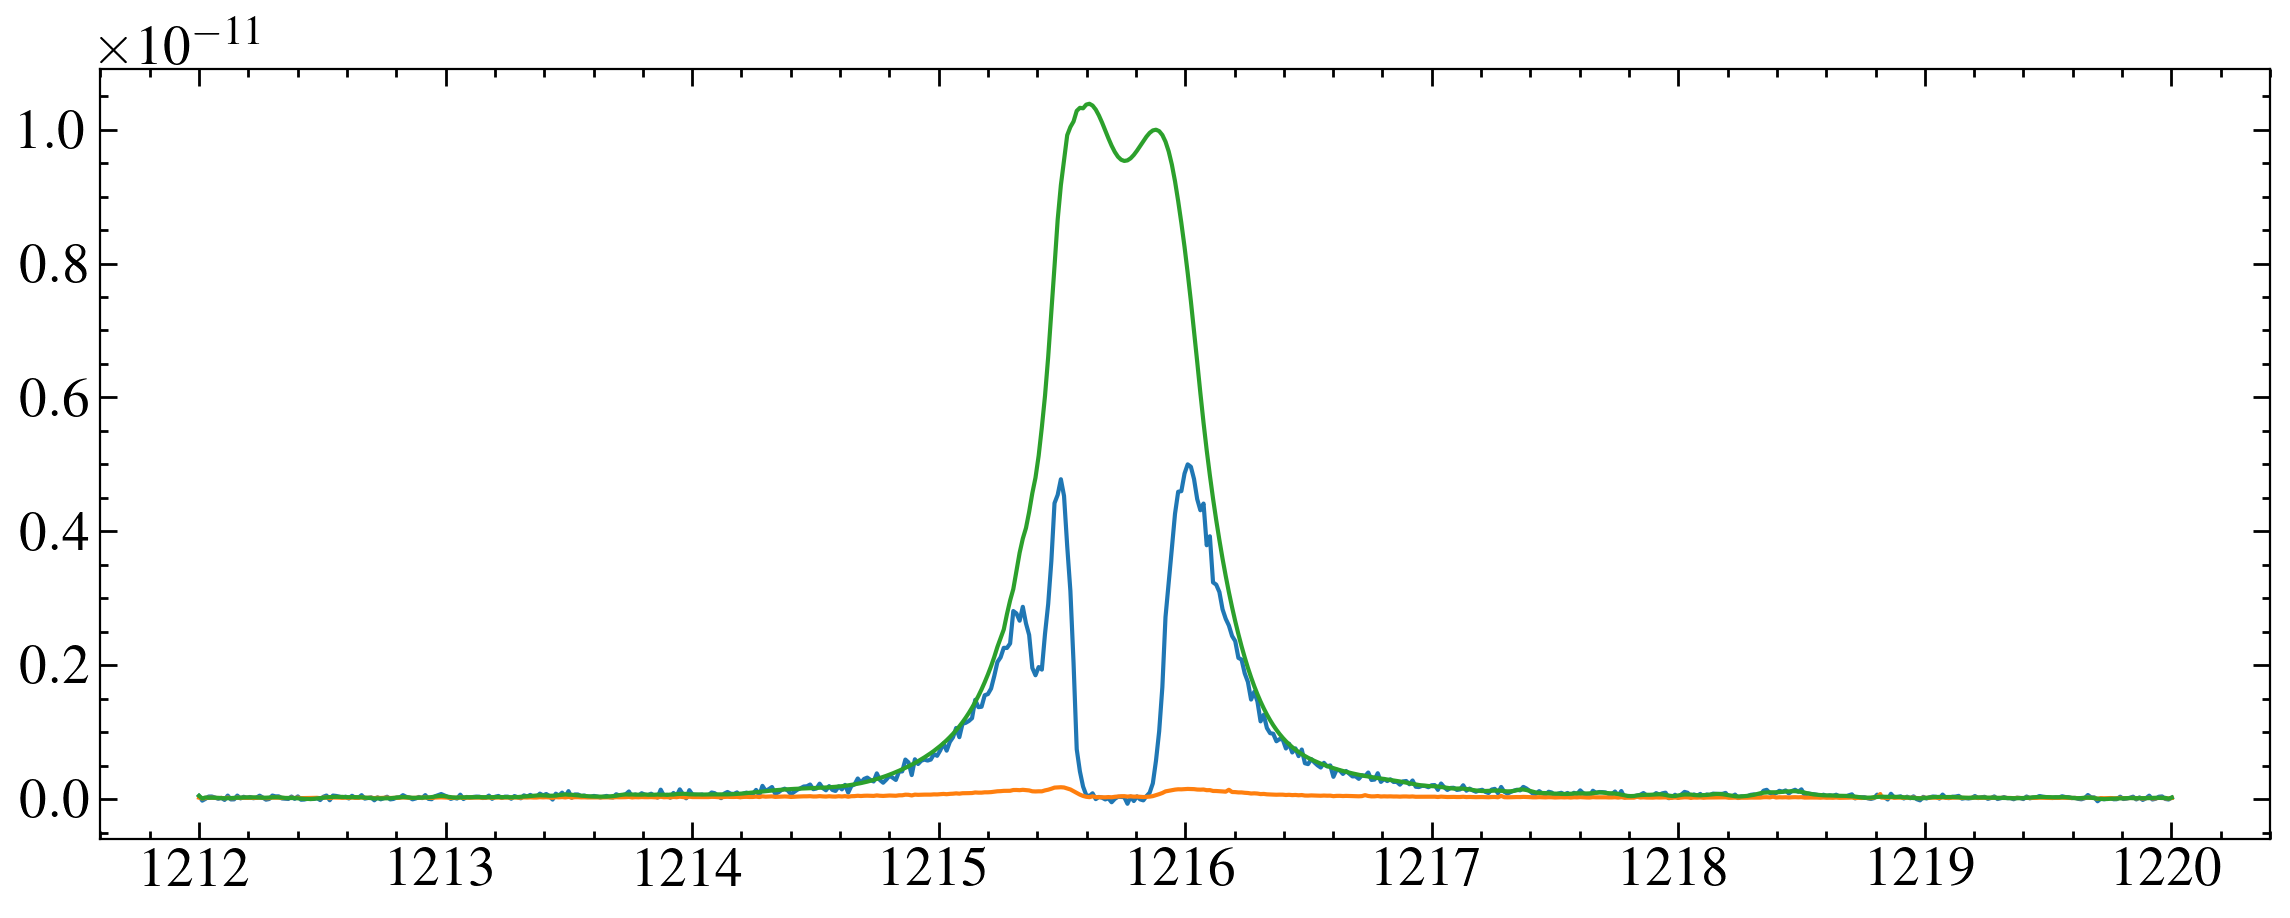

In [13]:
lyapath = '/media/david/2tb_ext_hd/hddata/hwo/data/lya/kap1cet/kcet_lya.txt'
lyaw, lyaf, lyae, lyamod = np.loadtxt(lyapath, unpack =True)
plt.plot(lyaw, lyaf)
plt.plot(lyaw, lyae)
plt.plot(lyaw, lyamod)

plt.show()
# lyamask = (lyamod > 0.0)
# plt.plot(lyaw[lyamask], (lyaf/lyamod)[lyamask])
# print(np.max(lyaf))

['CHANNEL', 'FLUX', 'ERROR']
2512
562


/tmp/ipykernel_251840/3544204709.py:9: RuntimeWarning: invalid value encountered in divide
  ex = (xdata['ERROR']/xdata['FLUX']) * fx


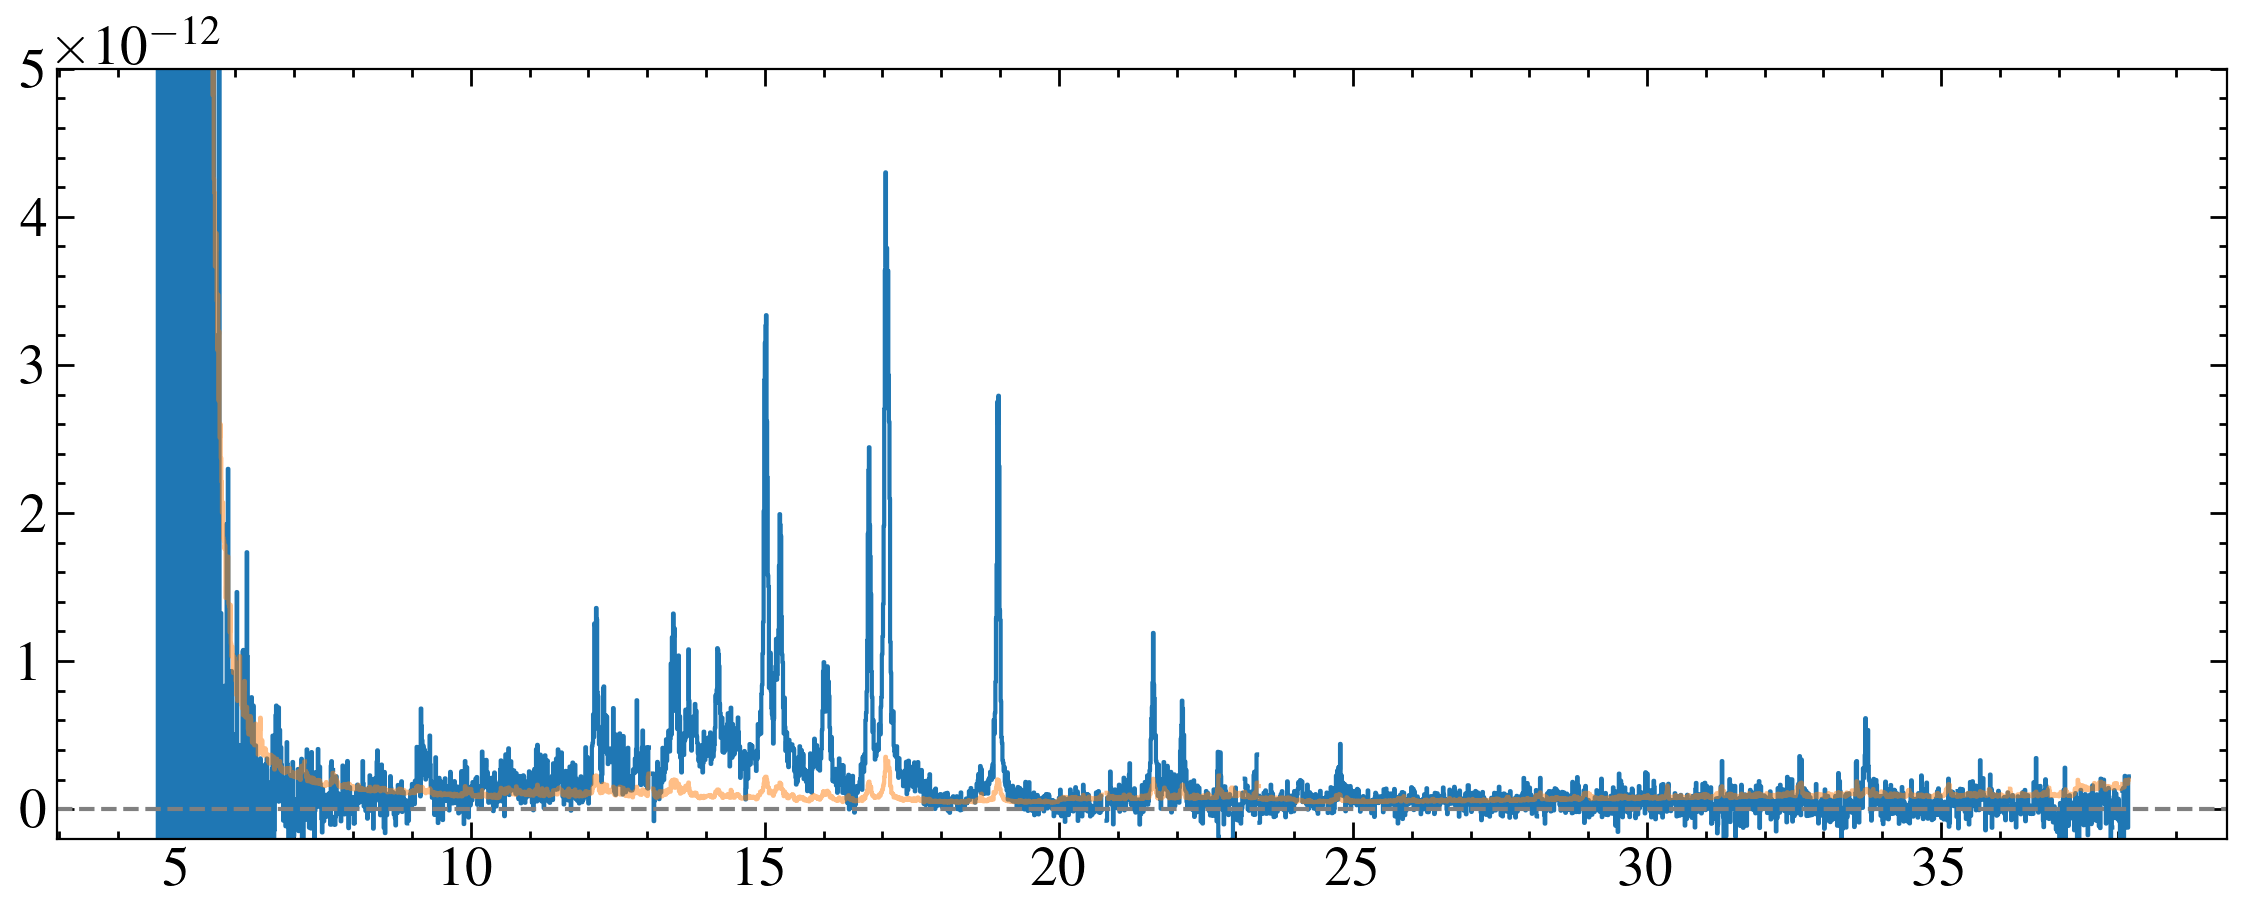

In [53]:
xpath = '/media/david/2tb_ext_hd/hddata/hwo/data/xmm/kap1cet/xray.fits'
xdata = fits.getdata(xpath, 1)
print(xdata.names)
# plt.plot(xdata['CHANNEL'], xdata['FLUX'])


wx = xdata['CHANNEL']*u.AA
fx  = (xdata['FLUX'] * (u.photon/u.s/u.cm**2/u.AA)).to(u.erg/u.s/u.cm**2/u.AA, equivalencies=u.spectral_density(wx))
ex = (xdata['ERROR']/xdata['FLUX']) * fx

plt.step(wx, fx, where='mid')
plt.step(wx, ex, where='mid', alpha =0.5)

wx, fx, ex = wx.value, fx.value, ex.value

plt.ylim(-0.2e-12, 5e-12)
plt.axhline(0, ls='--', c='0.5')

mask = wx > 7
print(len(fx[mask][fx[mask] > 0]))
print(len(fx[mask][fx[mask] < 0]))

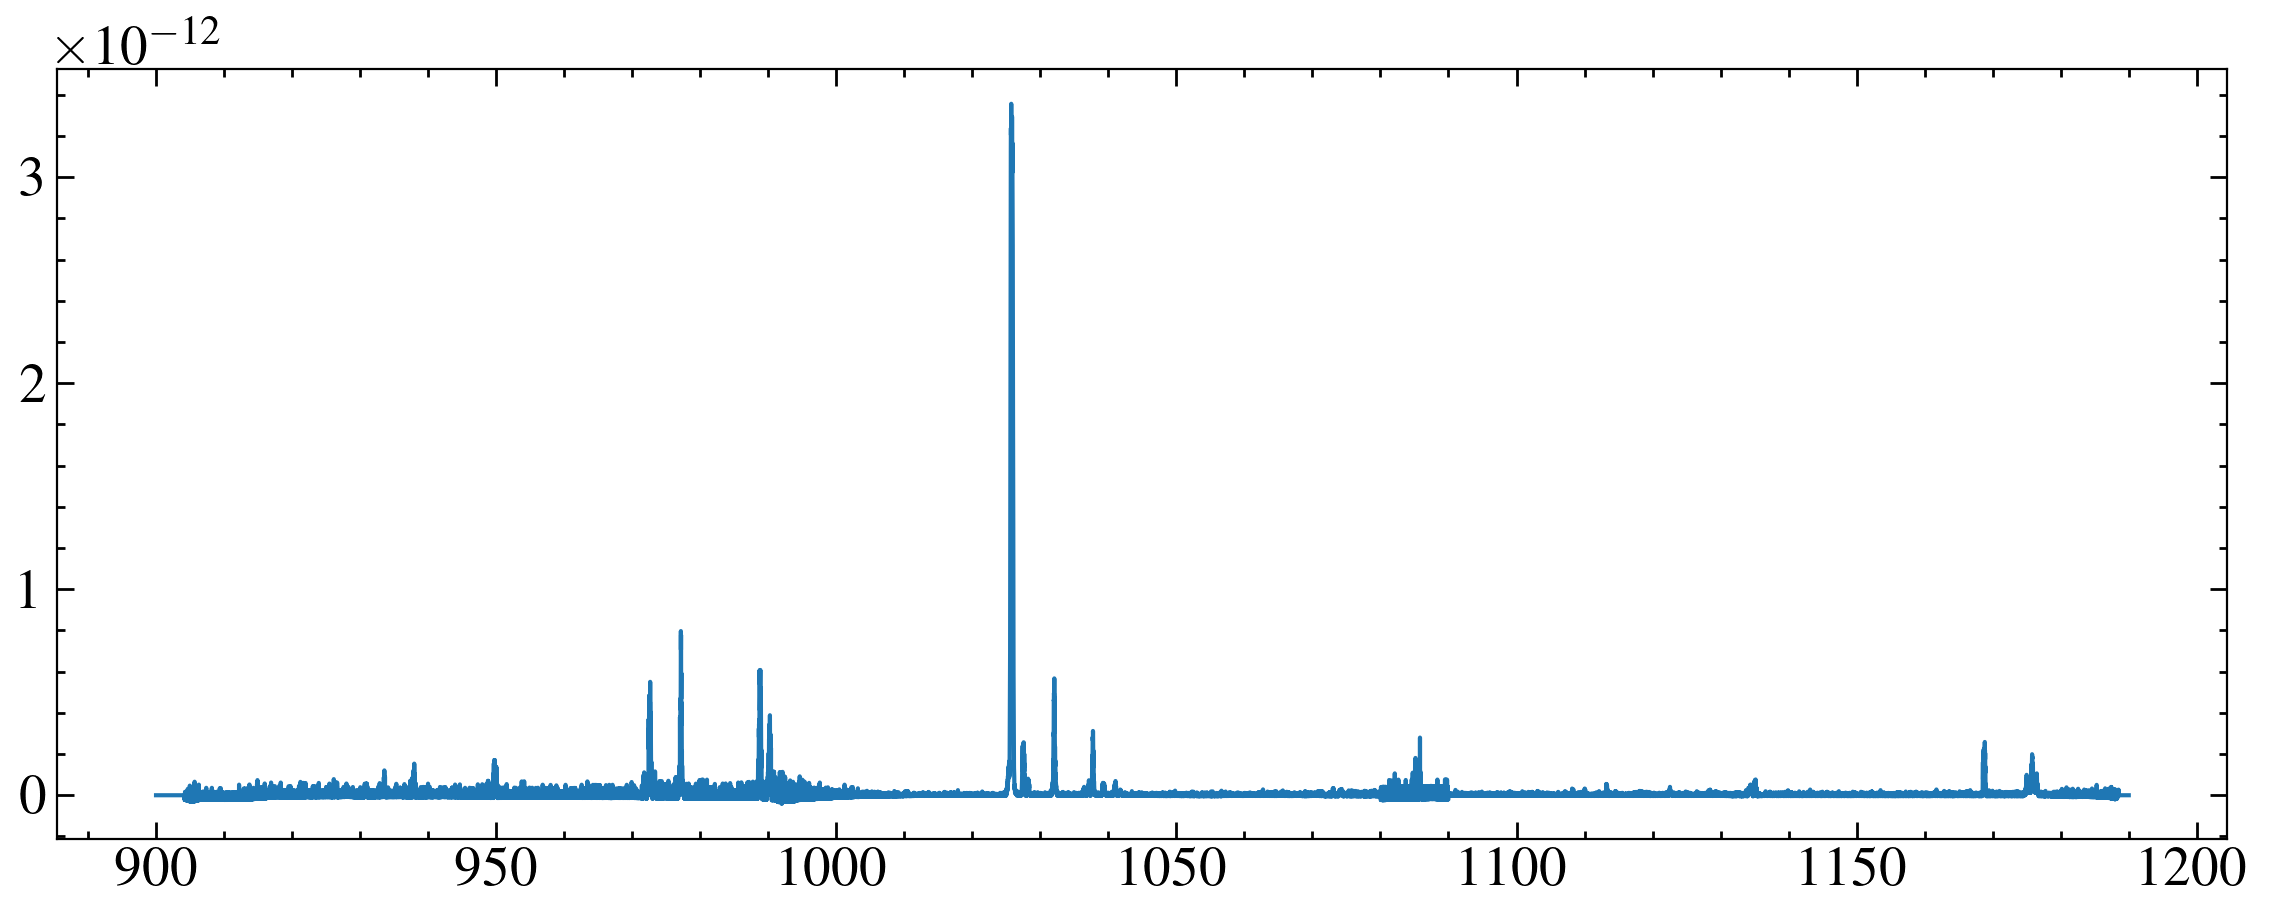

In [21]:
fusepath = '/media/david/2tb_ext_hd/hddata/hwo/data/fuse/kap1cet/fuse.fits'
fdata = fits.getdata(fusepath, 1)[0]
plt.plot(fdata['WAVE'], fdata['FLUX'])

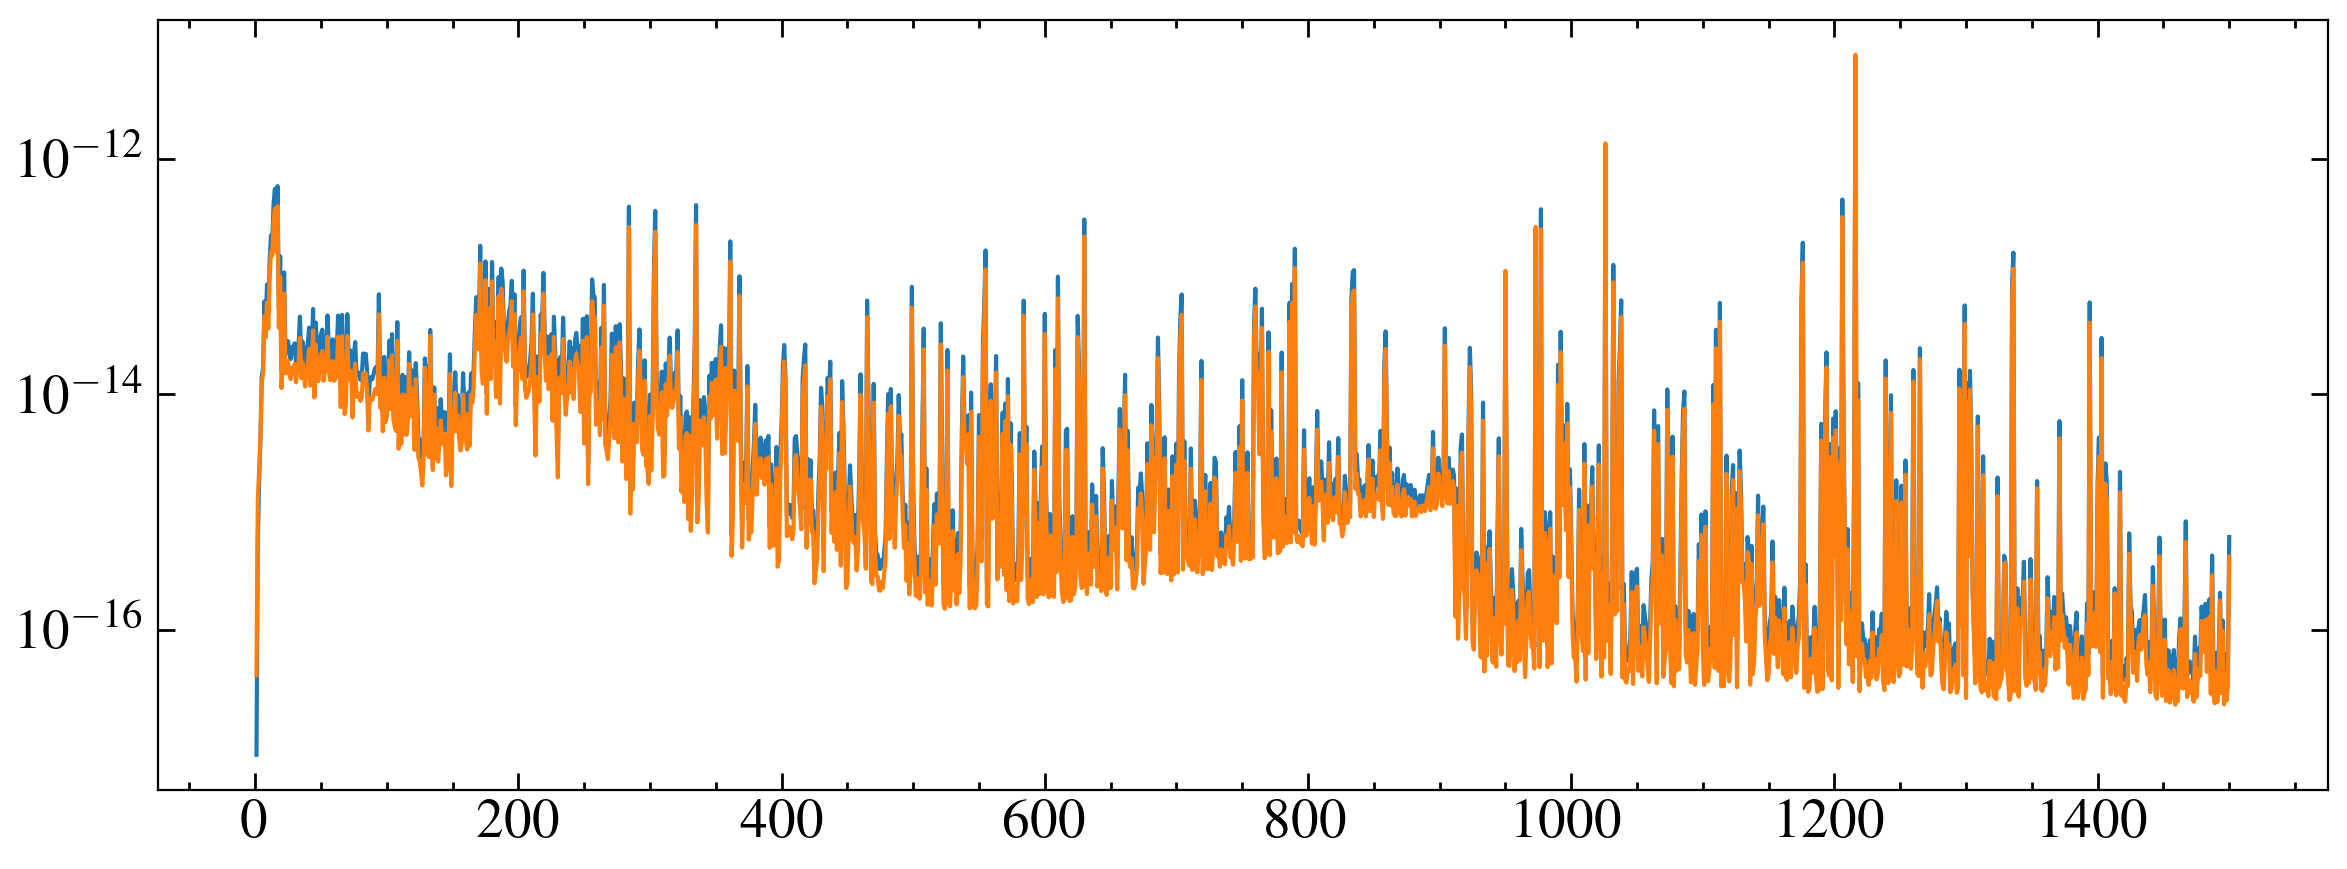

In [25]:
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/kap1cet/spectrum_kappa_ceti_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/kap1cet_dem.ecsv', overwrite=True)

(1e-15, 1.682307347502852e-10)

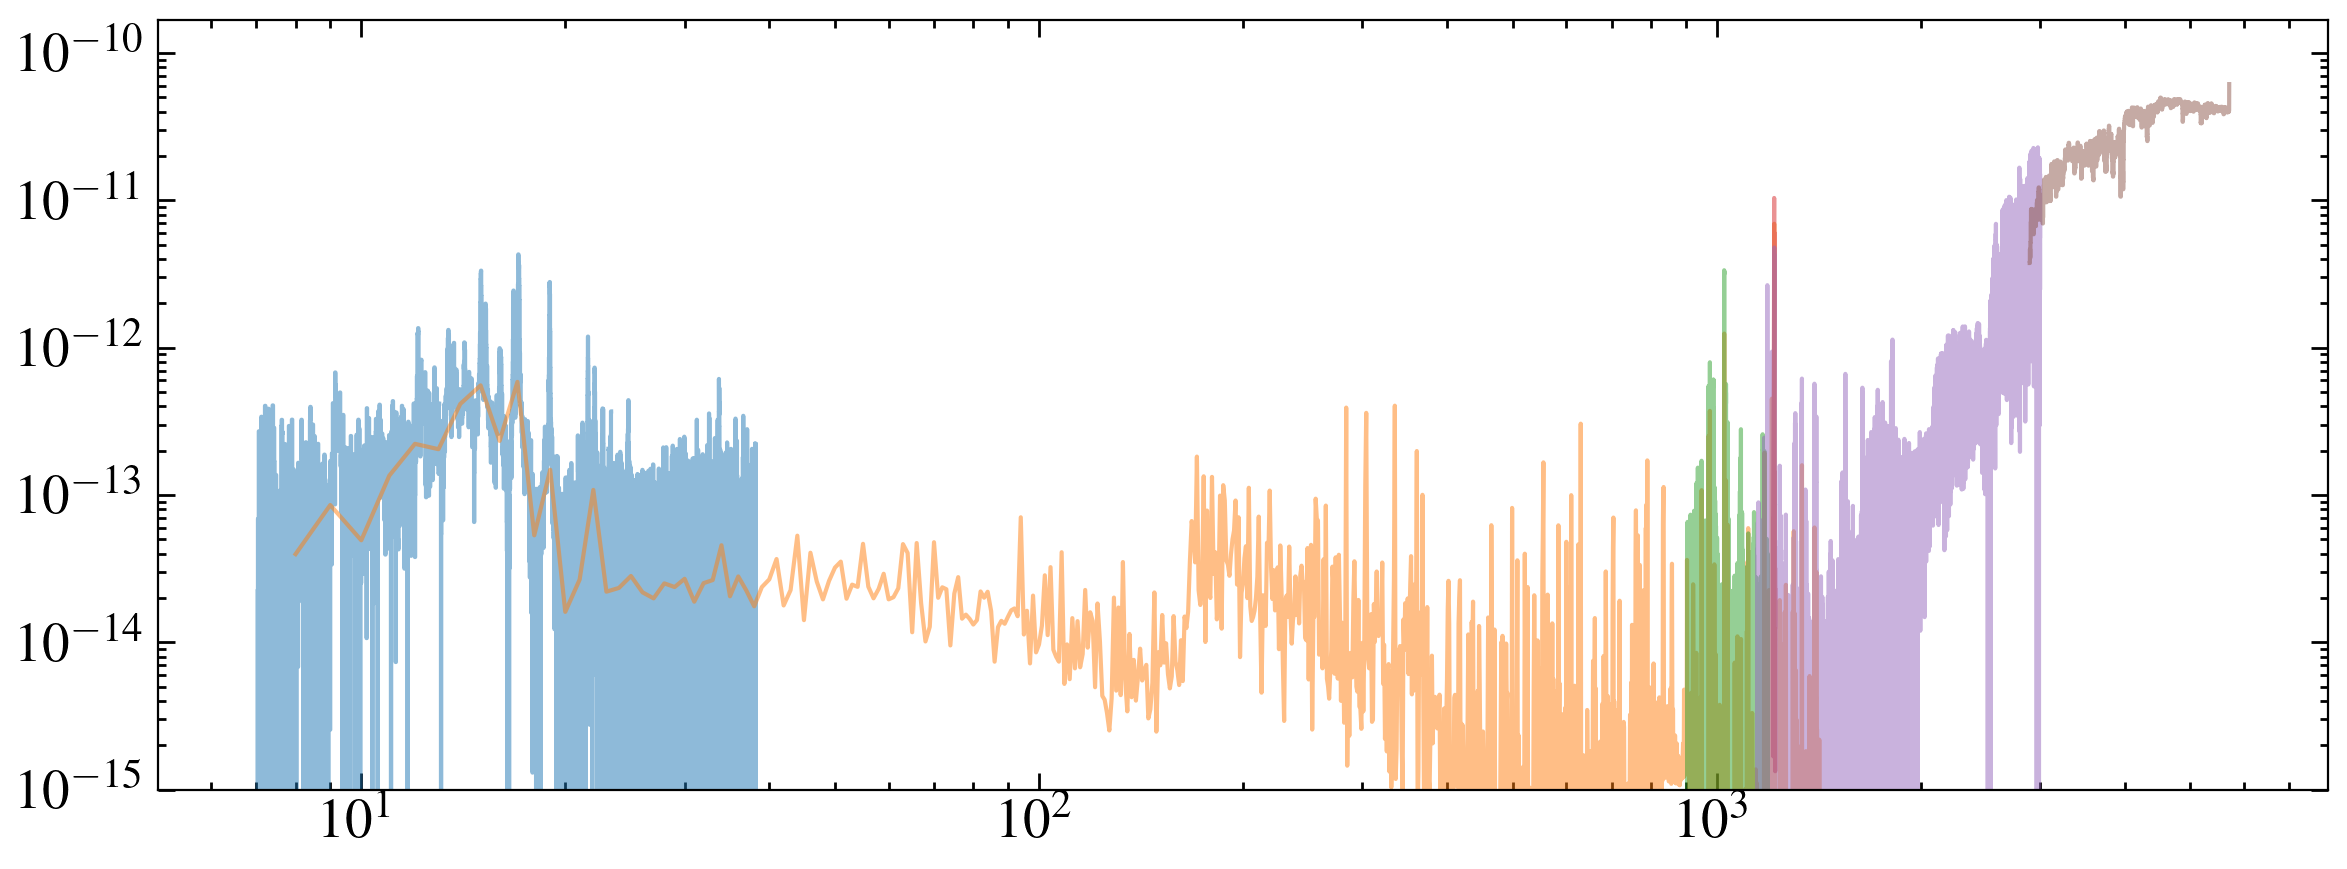

In [40]:
# plt.step(wx[(wx >7)], fx[(wx >7)], alpha=0.5, where='mid')
# plt.plot(dw[dw>7], df[dw>7], alpha=0.5)
# plt.step(fdata['WAVE'], fdata['FLUX'], alpha=0.5, where='mid')
# plt.plot(lyaw, lyamod, alpha=0.5)
# plt.step(w_uv, f_uv, where='mid', alpha=0.5)
# plt.step(ow, of, where='mid', alpha=0.5)

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1e-15)

In [43]:
import importlib
import prepare_phoenix_svo as pp
importlib.reload(pp)

<module 'prepare_phoenix_svo' from '/home/david/work/meats/SEDs/prepare_phoenix_svo.py'>

In [44]:
#params from HWO list


G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)

mass = 0.98
teff = 5709
teff_e = 11
radius = 0.946
distance = 9.2762
save_path = 'models/'
star = 'kap1cet'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
# print(np.log10(g.value))
g = 4.510
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc, 'Teff_e':teff_e}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=False, make_error=True)
normfac = ((radius*R)/(distance*u.pc.to(u.m)))**2
pdata = Table.read('models/kap1cet_phoenix_interpolated.ecsv')
pw, pf, pe =  pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR'] 

In [47]:
# plt.plot(pw, pf*normfac)
# plt.yscale('log')
# plt.xscale('log')

(1e-15, 1.682307347502852e-10)

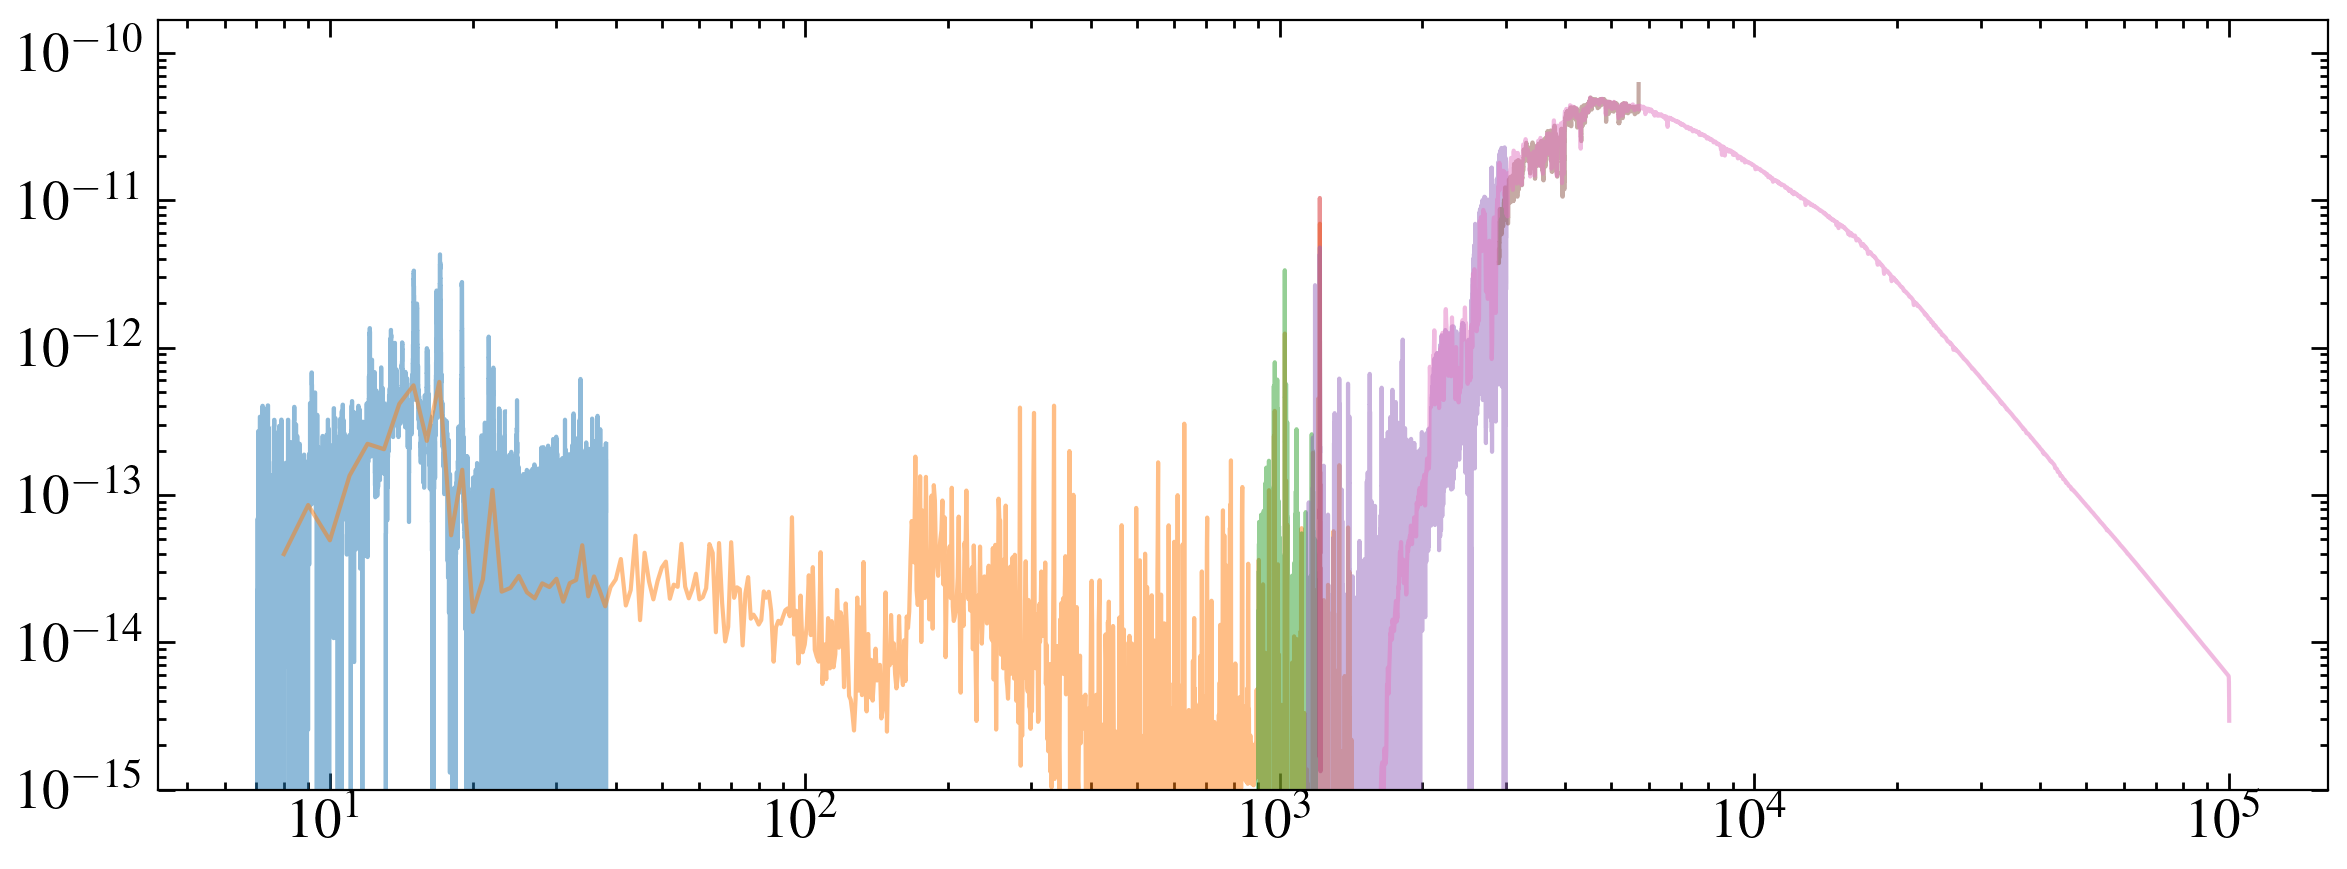

In [48]:
pmask = (pw > 1500) & (pw < 1e5)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)

plt.step(wx[(wx >7)], fx[(wx >7)], alpha=0.5, where='mid')
plt.plot(dw[dw>7], df[dw>7], alpha=0.5)
plt.step(fdata['WAVE'], fdata['FLUX'], alpha=0.5, where='mid')
plt.plot(lyaw, lyamod, alpha=0.5)
plt.step(w_uv, f_uv, where='mid', alpha=0.5)
plt.step(ow, of, where='mid', alpha=0.5)
plt.plot(pwi, pfi, alpha=0.5)

plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-15)